# Executive Report on Human Resource Data

### Import Appropriate Packages

In [117]:
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [118]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

## Data Loading and Cleaning

In [276]:
#read in the excel file
path = 'C:/Users/jmoore/HR-Data-Analysis/'
#path = 'C:/Users/James Moore/HR-Data-Analysis/'
address = 'C:/Users/jmoore/HR-Data-Analysis/HR-Employee-Attrition.xlsx'
#address = 'C:/Users/James Moore/HR-Data-Analysis/HR-Employee-Attrition.xlsx'


df = pd.read_excel(address)


### Codify All Categorical Features

In [277]:
categorical_vars = ['Attrition','BusinessTravel','Department',
                    'EducationField','Gender','JobRole','MaritalStatus','OverTime']
coded_vars = ['Attrition_coded','BusinessTravel_coded','Department_coded','EducationField_coded',
              'Gender_coded','JobRole_coded','MaritalStatus_coded','OverTime_coded']

#### Attrition

In [278]:
#Attrition
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [279]:
df['Attrition_coded'] = np.where(df['Attrition']=='Yes',1,0)

#### Business Travel

In [280]:
## BusinessTravel
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [281]:
# Condition all unique instances of Business Travel
conditions = [
    df['BusinessTravel']=='Travel_Rarely',
    df['BusinessTravel']=='Travel_Frequently',
    df['BusinessTravel']=='Non-Travel']
choices = [1,2,0]
df['BusinessTravel_coded'] = np.select(conditions,choices)

#### Department

In [282]:
## Department
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [283]:
# Condition all unique instances of Department
conditions = [
    df['Department']=='Sales',
    df['Department']=='Research & Development',
    df['Department']=='Human Resources'
]
choices = [0,1,2]
df['Department_coded'] = np.select(conditions,choices)

#### Education Field

In [284]:
## Education Field
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [285]:
# Condition all unique instances of Education Field
conditions = [
    df['EducationField'] == 'Life Sciences',
    df['EducationField'] == 'Other',
    df['EducationField'] == 'Medical',
    df['EducationField'] == 'Marketing',
    df['EducationField'] == 'Technical Degree',
    df['EducationField'] == 'Human Resources',
]
choices = [0,1,2,3,4,5]
df['EducationField_coded'] = np.select(conditions,choices)

#### Gender

In [286]:
## Gender
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [287]:
# Condition unique instances of Gender
df['Gender_coded'] = np.where(df['Gender']=='Male',1,0)

#### Job Role

In [288]:
## Job Role
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [289]:
# Condition all unique instances of Job Role
conditions= [
    df['JobRole'] == 'Sales Executive',
    df['JobRole'] == 'Research Scientist',
    df['JobRole'] == 'Laboratory Technician',
    df['JobRole'] == 'Manufacturing Director',
    df['JobRole'] == 'Healthcare Representative',
    df['JobRole'] == 'Manager',
    df['JobRole'] == 'Sales Representative',
    df['JobRole'] == 'Research Director',
    df['JobRole'] == 'Human Resources'
]
choices = [0,1,2,3,4,5,6,7,8]
df['JobRole_coded'] = np.select(conditions,choices)

#### Marital Status

In [290]:
## Marital Status
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [291]:
# Condition all unique instances of Marital Status
conditions = [
    df['MaritalStatus'] == 'Single',
    df['MaritalStatus'] == 'Married',
    df['MaritalStatus'] == 'Divorced'
]
choices = [0,1,2]
df['MaritalStatus_coded'] = np.select(conditions,choices)

#### Overtime

In [292]:
## Overtime
df['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [293]:
# Condition unique instances of Overtime
df['OverTime_coded'] = np.where(df['OverTime']=='Yes',1,0)

### Drop All Unnecessary Features

In [294]:
## Remove Variables that provide no information gain or loss
#  Theese features are constant for all observations.
vars_to_drop = ['EmployeeCount','StandardHours','Over18','EmployeeNumber']
df.drop(vars_to_drop,axis = 1, inplace=True)

## Use Random Forest to Identify Important Variables

In [295]:
target = df.Attrition
data = df.drop('Attrition',axis = 1, inplace=False)
Uncoded_vars = ['Attrition_coded','BusinessTravel','Department',
                'EducationField','Gender','JobRole','MaritalStatus','OverTime']
data = data.drop(Uncoded_vars,axis=1,inplace = False)

In [296]:
randForest = RandomForestClassifier(n_estimators=500,random_state=44)
randForest = randForest.fit(data,target)

### Plot Variable Importance with respect to Gini Importance

Text(0, 0.5, 'Important Features')

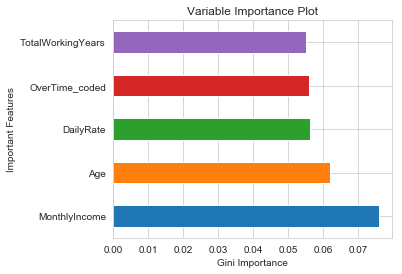

In [297]:
feat_importances = pd.Series(randForest.feature_importances_, index=data.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title("Variable Importance Plot")
plt.xlabel('Gini Importance')
plt.ylabel('Important Features')

### Visualizations

#### OverTime
The purpose of this plot is to visualize how Overtime is related to attrition rate

In [298]:
# Initialize indexing list
test_list = pd.Series(range(0,len(df.index)))

# Compute attrition rate for overtime
ot_yes = sum(1 for i in test_list if df.OverTime[i]=='Yes' and df.Attrition[i] == 'Yes')
tot_ot_yes = sum(1 for i in test_list if df.OverTime[i]=='Yes')


In [299]:
# Compute attrition rate for no overtime
ot_no = sum(1 for i in test_list if df.OverTime[i]=='No' and df.Attrition[i] == 'Yes')
tot_ot_no = sum(1 for i in test_list if df.OverTime[i]=='No')


In [300]:
# Compute total number or attrition cases company wide
tot_att = sum(1 for i in test_list if df.Attrition[i]=='Yes')

In [301]:
# Create a list of attrition rates for overtime, no overtime, and company average
attritionRates = [ot_yes/tot_ot_yes,ot_no/tot_ot_no,tot_att/len(ot_att.index)]
attritionRates

[0.30528846153846156, 0.10436432637571158, 0.16122448979591836]

Text(0, 0.5, 'Attrition Rate')

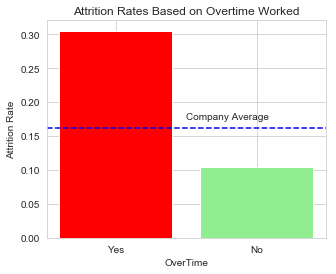

In [302]:
# Generate Plot
x = ['Yes','No']
y = [attritionRates[0],attritionRates[1]]
plt.bar(x,y,color = ['red','lightgreen'])
plt.axhline(attritionRates[2], color='b',linestyle = 'dashed')
plt.annotate('Company Average', xy = (1,attritionRates[2]),xytext = (0.5,0.175))
plt.title('Attrition Rates Based on Overtime Worked')
plt.xlabel('OverTime')
plt.ylabel('Attrition Rate')

The takeaway from the above chart is that Attrition rate is much higher for individuals who work overtime.

#### Monthly Income and Total Working Years

Text(0.5, 1.0, 'Monthly Income on Working Years by Attrition')

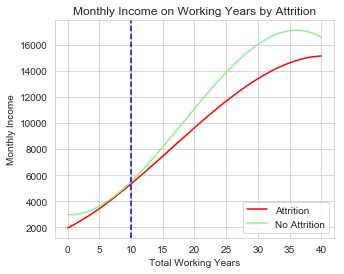

In [303]:
# Subset data into attrition and non-attrition groups
att_inc = df[df['Attrition']=='Yes']
noatt_inc = df[df['Attrition']=='No']

# Fit Cubic Polynomial of Total Working Years on Monthly Income
poly_fit1 = np.poly1d(np.polyfit(att_inc['TotalWorkingYears'],att_inc['MonthlyIncome'],deg = 3))
poly_fit2 = np.poly1d(np.polyfit(noatt_inc['TotalWorkingYears'],noatt_inc['MonthlyIncome'],deg = 3))

# Create Linspace for smoothing Curve 
t = np.linspace(df.TotalWorkingYears.min(),df.TotalWorkingYears.max(),200)

# Generate Plot
plt.plot(t,poly_fit1(t),color = 'red',label = "Attrition")
plt.plot(t,poly_fit2(t),color = 'lightgreen', label ="No Attrition")
plt.axvline(10, color='b',linestyle = 'dashed')
plt.legend()
plt.xlabel('Total Working Years')
plt.ylabel('Monthly Income')
plt.title('Monthly Income on Working Years by Attrition')

The above plot shows that after about 10 years of working, there is a larger discepency in monthly income between those who experience attrition and those who do not.

### Classification Tree on 5 Most Important Variables

In [304]:
feat_importances.nlargest(5)

MonthlyIncome        0.075846
Age                  0.062068
DailyRate            0.056363
OverTime_coded       0.056065
TotalWorkingYears    0.055156
dtype: float64

In [305]:
# Create Classification Tree
tree_dat = data[['MonthlyIncome','Age','DailyRate','OverTime_coded','TotalWorkingYears']]
class_tree = tree.DecisionTreeClassifier(max_depth=5)
class_tree = class_tree.fit(tree_dat,target)

## Logistic Regression Model

### Set Dummy Variables for Categorical Data

In [333]:
logReg_dat = df.drop(coded_vars,axis=1,inplace=False)
logReg_dat = logReg_dat.drop('Attrition',axis=1,inplace=False)
logCat_vars = ['BusinessTravel','Department','EducationField',
               'Gender','JobRole','MaritalStatus','OverTime']

# Create Dummy Variables
for var in logCat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(logReg_dat[var], prefix=var)
    logReg_dat=logReg_dat.join(cat_list)

# Remove non-dummy variables
data_vars=logReg_dat.columns.values.tolist()
to_keep=[i for i in data_vars if i not in logCat_vars]
data_final=logReg_dat[to_keep]

# Create 'fold' variable for cross Validation
np.random.seed(44)
foldList = np.random.permutation(test_list%5)
data_final.insert(0,'fold',foldList)
resp_var = pd.concat([df['Attrition'], data_final['fold']], axis=1)

### Run 5-Fold Cross Validation on Logistic Regression Model

In [398]:
five_fold = [0,1,2,3,4]
upper = 11
tune_range = pd.Series(range(0,upper))
avg_Acc = pd.Series(range(0,upper))

acc_matrix = np.zeros((upper,5))

for tune_num in tune_range:   
    for fold_num in five_fold:
        #subset training set
        preds_train = data_final.loc[data_final['fold'] != fold_num]
        preds_train = preds_train.drop('fold',axis=1,inplace=False)
        resp_train = resp_var.loc[resp_var['fold'] != fold_num]
        resp_train = resp_train.Attrition

        #subset test set
        preds_test = data_final.loc[data_final['fold'] == fold_num]
        preds_test = preds_test.drop('fold',axis=1,inplace=False)
        resp_test = resp_var.loc[resp_var['fold'] == fold_num]
        resp_test = resp_test.Attrition
    
        #build Model
        logReg_obj = LogisticRegression(solver = 'liblinear')
        logReg_mod = RFE(logReg_obj,(20-tune_num))
        lmOut = logReg_mod.fit(preds_train,resp_train)

        # Evaluate Accuracy
        y_pred = lmOut.predict(preds_test)
        test_list = pd.Series(range(0,len(y_pred)))
        class_accuracy = sum(1 for i in test_list if y_pred[i] == resp_test.values[i])/(len(y_pred))
        acc_matrix[tune_num,fold_num] = class_accuracy

### Print Classification Accuracy Results

In [401]:
mean_array = np.mean(acc_matrix, axis=1)
print(mean_array)
print(np.argmax(mean_array))
print(mean_array[np.argmax(mean_array)])
print(mean_array.max()-mean_array.min())

[0.85442177 0.85510204 0.85578231 0.85170068 0.84965986 0.85170068
 0.85238095 0.85102041 0.85034014 0.84761905 0.84353741]
2
0.85578231292517
0.012244897959183598


In [402]:
import statsmodels.api as sm

logit_model=sm.Logit(resp_train,preds_train)
result=logit_model.fit()
print(result.summary2())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).